In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Pratham-2504/Logistic-Regression/main/penguins_binary_classification.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [3]:
print(df.info())
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB
None


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      274.000000     274.000000         274.000000   274.000000   
mean        42.702920      16.836131         202.178832  4318.065693   
std          5.195566       2.013410          15.047938   835.933105   
min         32.100000      13.100000         172.000000  2850.000000   
25%         38.350000      15.0000

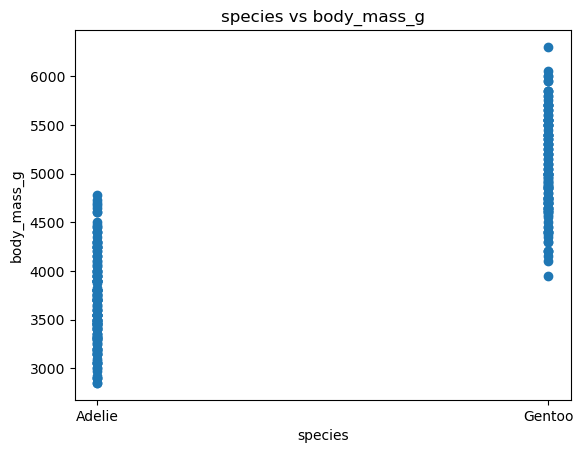

In [4]:
plt.scatter(df['species'],df['body_mass_g'])
plt.title('species vs body_mass_g')
plt.xlabel('species')
plt.ylabel('body_mass_g')
plt.show()

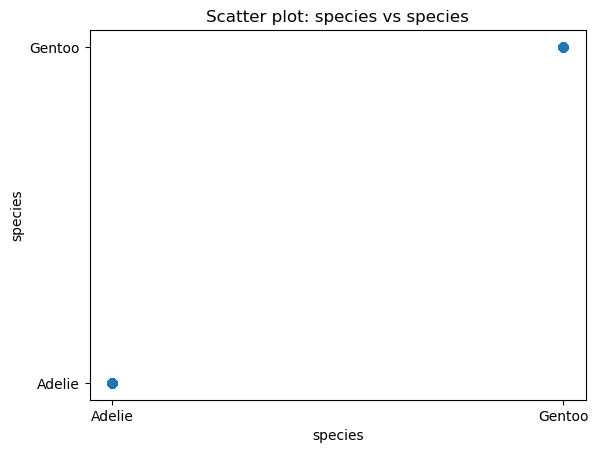

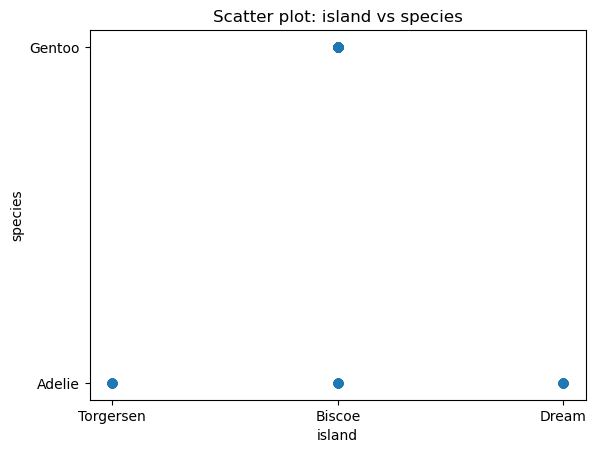

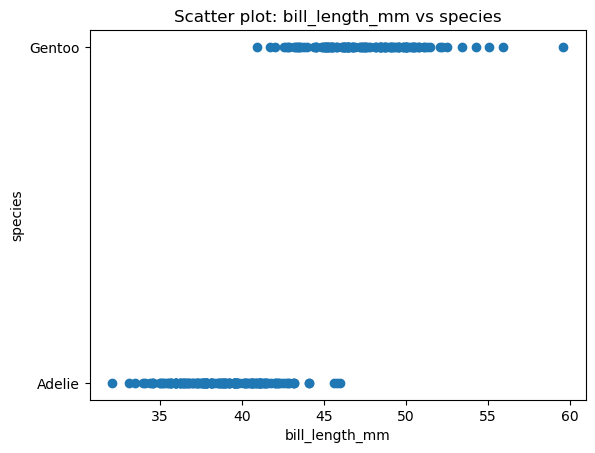

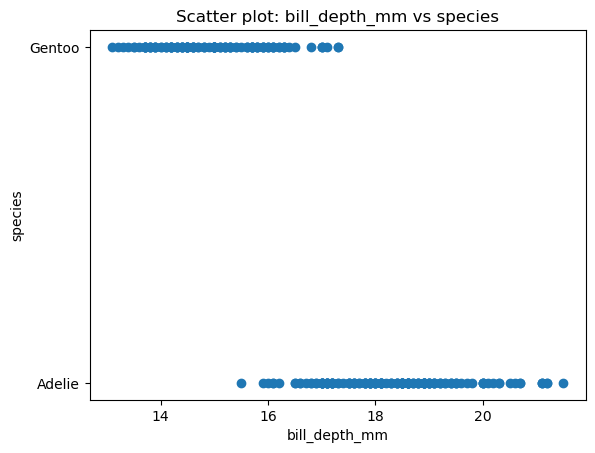

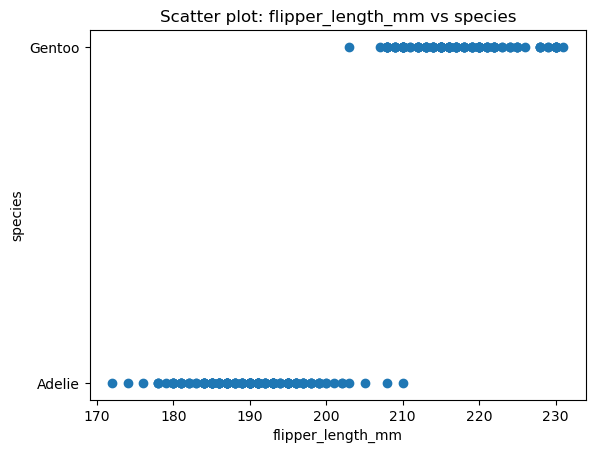

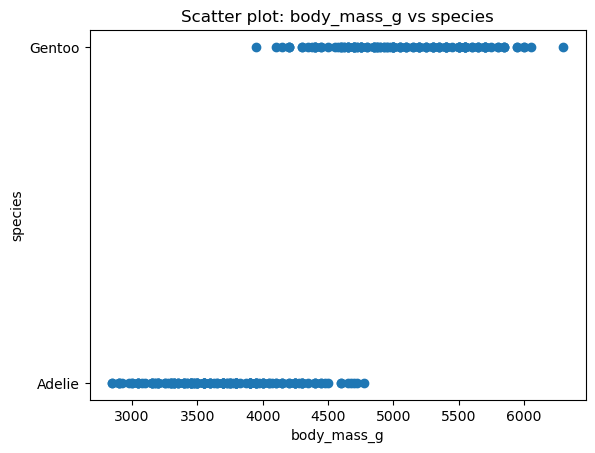

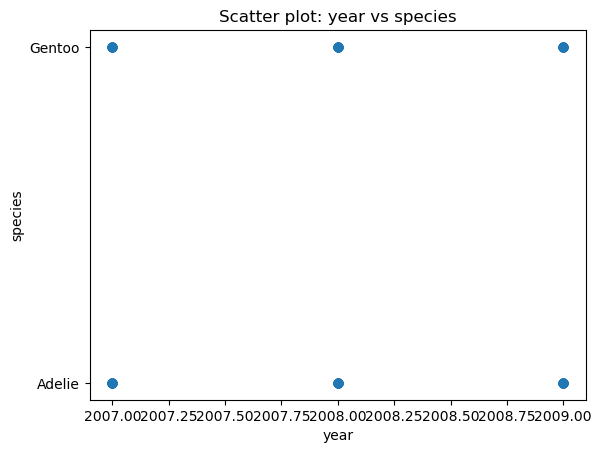

In [5]:
for column in df:
    plt.scatter(df[column], df['species'])
    plt.title(f'Scatter plot: {column} vs species')
    plt.xlabel(column)
    plt.ylabel('species')
    plt.show()

<Axes: >

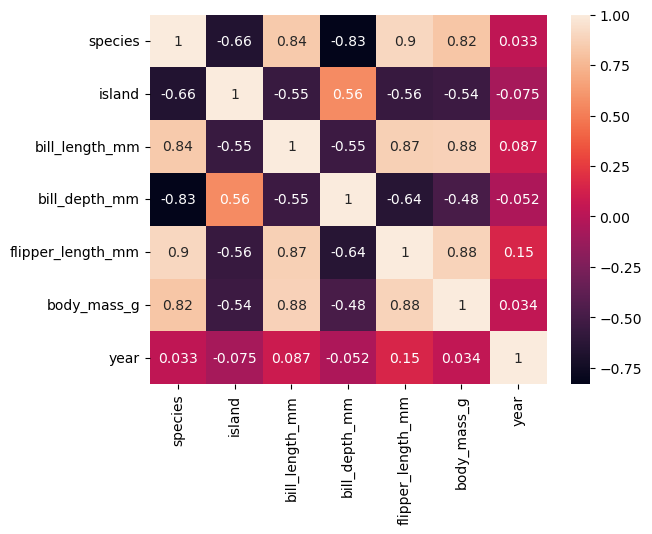

In [6]:
encoder = LabelEncoder()

df['species'] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

In [8]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,2,39.1,18.7,181.0,3750.0,2007
1,0,2,39.5,17.4,186.0,3800.0,2007
2,0,2,40.3,18.0,195.0,3250.0,2007
3,0,2,36.7,19.3,193.0,3450.0,2007
4,0,2,39.3,20.6,190.0,3650.0,2007


In [9]:
X = df[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']]
y = df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
177,0,44.5,14.3,216.0,4100.0,2007
248,0,46.9,14.6,222.0,4875.0,2009
74,2,42.8,18.5,195.0,4250.0,2008
170,0,48.7,15.1,222.0,5350.0,2007
29,1,39.5,16.7,178.0,3250.0,2007


In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
y_pred = model.predict(X_test)

Model achieved a classification accuracy of:	1.0


Model Confusion Matrix


Jaccard Similarity Score:	1.0


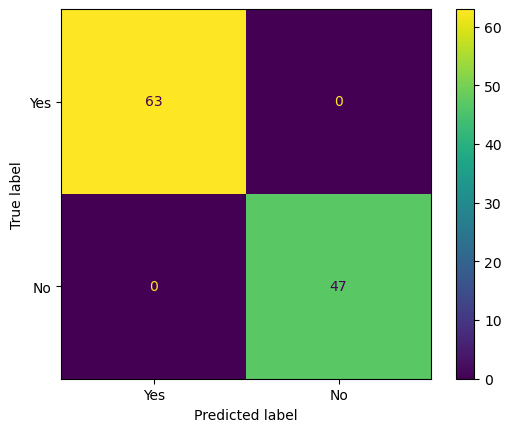

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(y_test,y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(y_test,y_pred))